In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit import assemble
from qiskit.circuit.library import RYGate, HGate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arccos,sqrt,log2,ceil,floor
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, circuit_drawer


Quantum Circuit After Decomposition


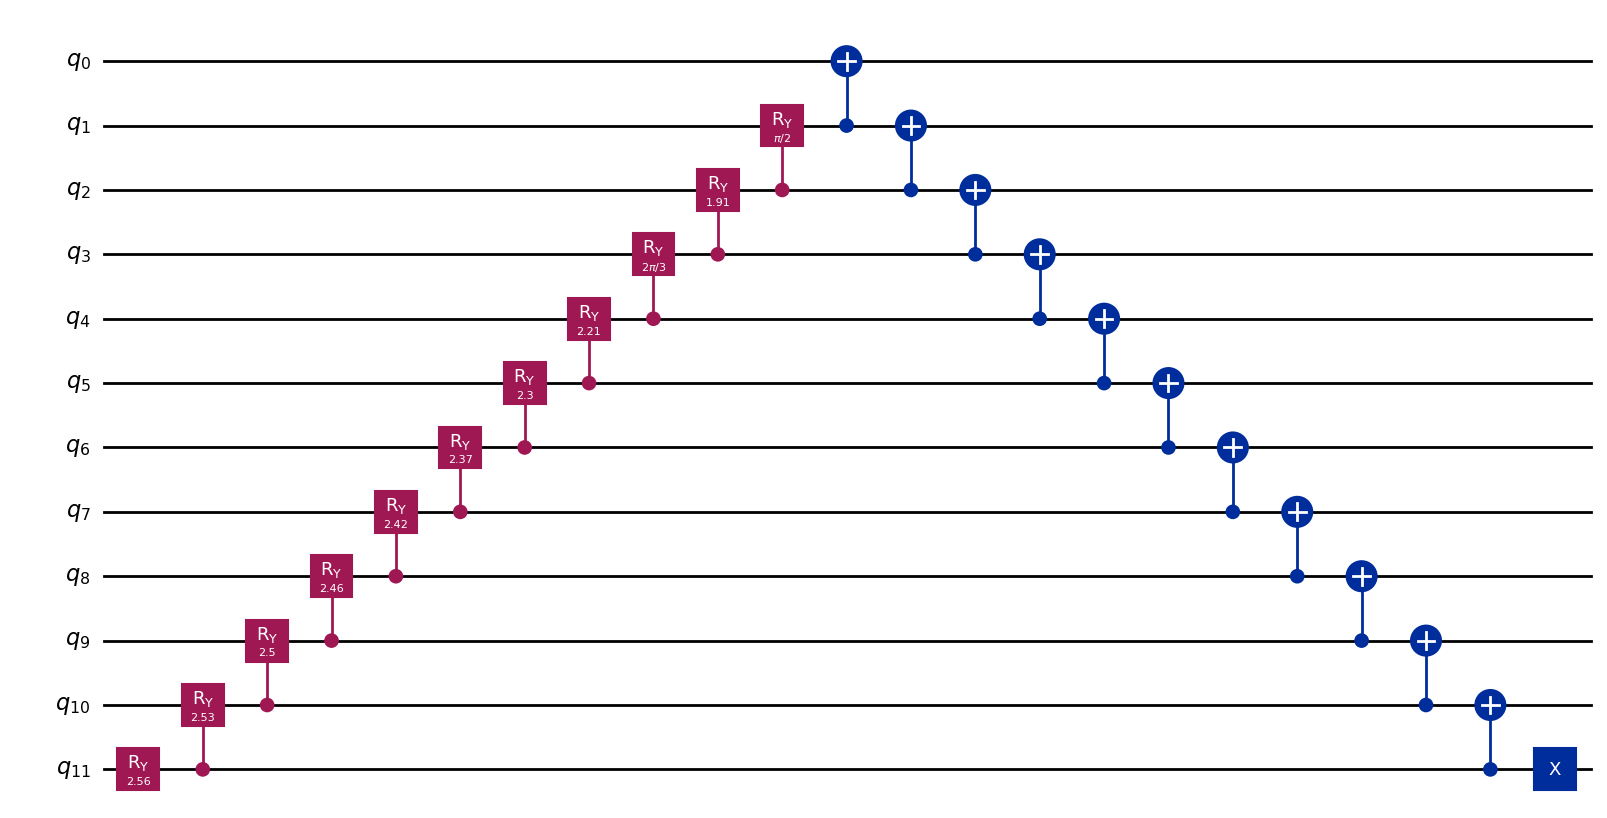

Circuit depth after decomposition: 23

Output Statevector


<IPython.core.display.Latex object>

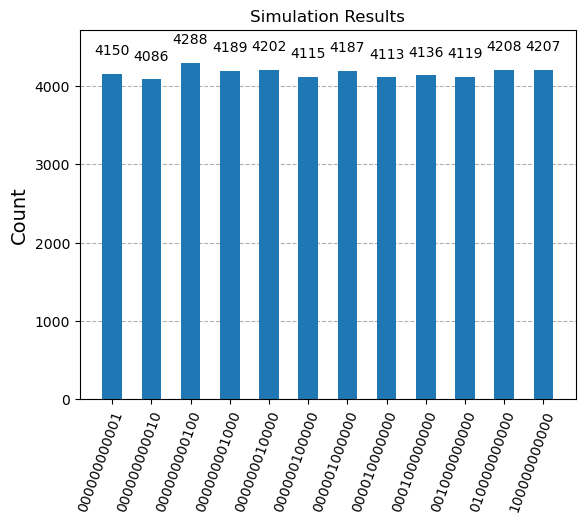

In [14]:


def create_consecutive_ones_circuit(n):
    qc = QuantumCircuit(n)
    
    # Calculate angles for rotations: theta_k = 2 * arccos(sqrt(1/k)) for k = n down to 2
    angles = [2 * np.arccos(np.sqrt(1/k)) for k in range(n, 1, -1)]
    
    # Apply initial rotation to the most significant qubit (index n-1)
    if n > 0:
        qc.ry(angles[0], n-1)
    
    # Apply controlled rotations (cry gates)
    for j in range(0, n-2):
        control_qubit = n-1 - j
        target_qubit = control_qubit - 1
        qc.cry(angles[j+1], control_qubit, target_qubit)
    
    # Apply cascade of CNOT gates
    for control in range(1, n):
        qc.cx(control, control-1)
    
    # Apply X gate to the most significant qubit
    qc.x(n-1)
    
    return qc


n = 12
qc = create_consecutive_ones_circuit(n)

#qc = qc.decompose()

print("\nQuantum Circuit After Decomposition")
display(qc.draw('mpl'))
print(f"Circuit depth after decomposition: {qc.depth()}")

sim = Aer.get_backend('statevector_simulator')
result = sim.run(qc).result()
output_state = result.get_statevector(qc)
print("\nOutput Statevector")
display(output_state.draw('latex'))


qc_measure = qc.copy()
qc_measure.measure_all()
sim = Aer.get_backend('qasm_simulator')
counts = sim.run(qc_measure, shots=50000).result().get_counts()
display(plot_histogram(counts, title='Simulation Results'))